# run cracking

In [4]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from helper_func import *
from cracking import Cracking_Model

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# case study

In [7]:
class Param: pass
raw_pars = Param()

r0_bar_mean = 5e-3
x_loss_mean = 12.5e-6*0.6 # m
cover_mean = 4e-2
f_t_mean=5.
E_0_mean=32e3

raw_pars.r0_bar = Normal_custom(r0_bar_mean, 0.1*r0_bar_mean, non_negative=True)
raw_pars.x_loss = Normal_custom(x_loss_mean, 0.1*x_loss_mean, non_negative=True)
raw_pars.cover = Normal_custom(cover_mean, 0.1*cover_mean, non_negative=True)
raw_pars.f_t = Normal_custom(f_t_mean, 0.1*f_t_mean, non_negative=True)
raw_pars.E_0 = Normal_custom(E_0_mean, 0.1*E_0_mean, non_negative=True)
raw_pars.w_c = Normal_custom(0.5, 0.1*0.6, non_negative=True)
raw_pars.r_v = Beta_custom(2.96, 2.96*0.05, 3.3, 2.6)  # volumetric expansion rate  2.96 lower 2.6  upper: 3.3



In [8]:
M = Cracking_Model(raw_pars)
# M.run(stochastic=False)
%time M.run(stochastic=True)

CPU times: user 3.55 s, sys: 382 ms, total: 3.93 s
Wall time: 3.93 s


In [9]:
%prun -s cumulative M.run(stochastic=True)

         3200059 function calls (2900057 primitive calls) in 4.683 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    4.683    4.683 {built-in method builtins.exec}
        1    0.000    0.000    4.683    4.683 <string>:1(<module>)
        1    0.024    0.024    4.683    4.683 cracking.py:254(run)
        1    0.056    0.056    4.659    4.659 cracking.py:230(solve_stress_strain_crack_stochastic)
        1    0.082    0.082    3.073    3.073 cracking.py:241(<listcomp>)
   100000    0.050    0.000    2.991    0.000 <__array_function__ internals>:2(linspace)
400010/100008    0.477    0.000    2.930    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
   100000    1.117    0.000    2.789    0.000 function_base.py:26(linspace)
        1    0.098    0.098    1.489    1.489 cracking.py:129(strain_stress_crack_f)
        3    1.112    0.371    1.112    0.371 cracking.py:92(s

In [10]:
M.postproc()
print(M.crack_visible_rate_count)

for stochastic solution only
0.0


(array([29714.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 70286.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

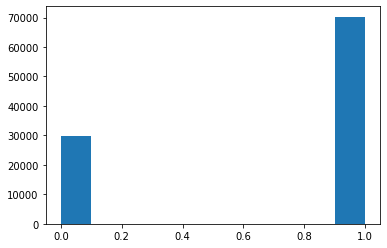

In [11]:
plt.figure()
plt.hist(M.crack_condition)

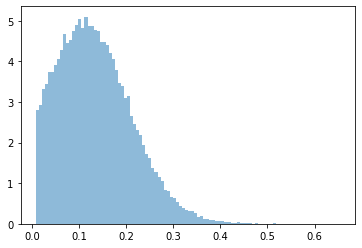

In [12]:
Hist_custom(M.crack_length_over_cover[M.crack_length_over_cover != 0])